> # Multiple Linear Regression

In this notebook, i well predect the price of the house using the Linear Regression model. `without use` any machine learning library.

## 1- Package

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipympl
import pandas as pd

from   sympy import *

%matplotlib widget

## 2- import data

In [193]:
path = './data/Housing.csv'

data = pd.read_csv(path)

data.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [194]:
furnishingstatus_map = {
    'furnished' :3,
    'semi-furnished' :2,
    'unfurnished' : 1 
}
boolian_map = {
    'yes':1,
    'no' :0
}

data['furnishingstatus'] = data['furnishingstatus'].map(furnishingstatus_map)
data['mainroad']  =  data['mainroad'].map(boolian_map)
data['guestroom'] = data['guestroom'].map(boolian_map)
data['basement']  =  data['basement'].map(boolian_map)
data['hotwaterheating']  =  data['hotwaterheating'].map(boolian_map)
data['airconditioning'] = data['airconditioning'].map(boolian_map)
data['prefarea']  =  data['prefarea'].map(boolian_map)



print(data)

x_tarin = data.values[:,1:]
y_tarin = data["price"].values

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

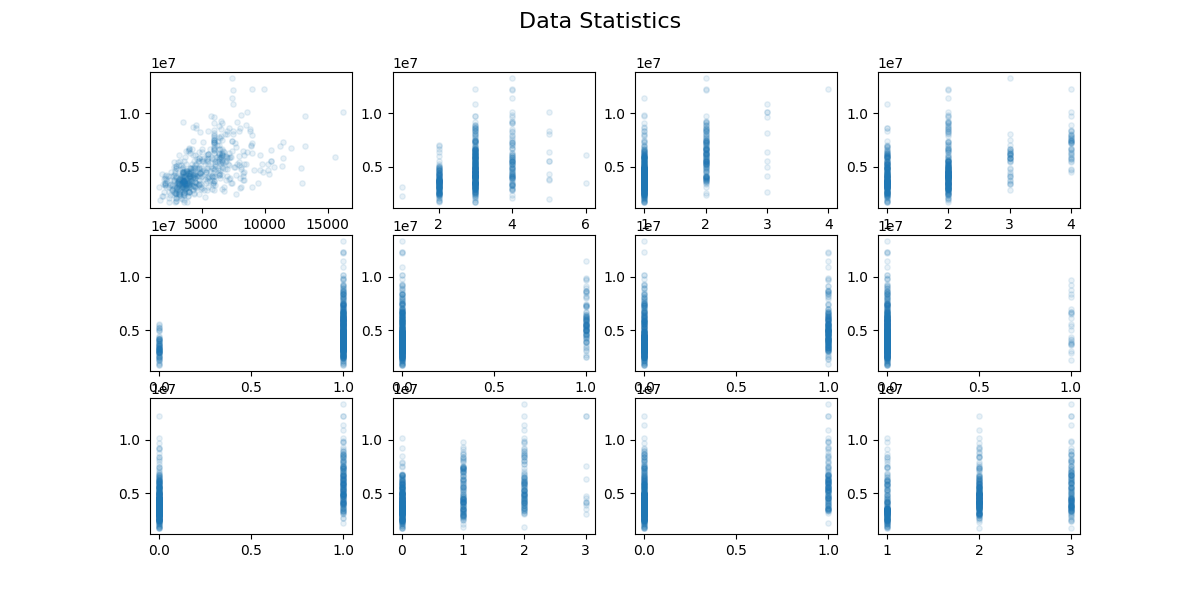

In [195]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Data Statistics', fontsize=16)
 
for i in range(1,13):
    ax = fig.add_subplot(3,4,i)
    ax.scatter(data.iloc[:,i],data['price'], alpha=0.1 ,s=15, label='Price vs '+data.columns[i])


In [197]:
area = data['area'].values
price= data['price'].values

area = np.array(area)
price= np.array(price)

std_area = np.std(area)
mean_area = np.mean(area)

nrm_area = (area - np.mean(area)) / np.std(area)
nrm_price= (price- np.mean(price)) / np.std(price) 




$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 

knowing that :

$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
and  
$
$
\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})
$

where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [238]:
b_init = 100
w_init = np.array([13,412,444,1111,2452,1134,1029,11,0,-199,-1,57])

## Predection function


In [239]:
def pred(data,w,b):    
    r = np.dot(data,w)+b
    return r

##  Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $C(\mathbf{w},b)$ is:
$$C(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 



In [249]:
def cost_function(data,price,w,b):
    """
    Args:
      data (ndarray (m,n)): Data, m examples with n features
      price (ndarray (m,)): target values
      w (ndarray (n,))    : model parameters  
      b (scalar)          : model parameter
    """
    
    m = data.shape[0]
    cost = 0.0
    for i in range(m):
      cost =+ ((pred(data[i],w,b) - price[i])**2)
    cost = cost/(2*m) 
    
    return cost

In [248]:
cost_function(x_tarin,y_tarin,w_init,b_init)

12729526225144.686

## Gredient Descent 

\begin{align}

\frac{\partial C }{ \partial w} &= 
\frac{1}{n}\sum_{i=1}^{n} \left(wx_i+b - y_i\right)x_i,\\
\frac{\partial C }{ \partial b } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(wx_i+b - y_i\right),
\tag{2}\end{align}


\begin{align}
\begin{cases}
w_1&= w- \alpha \frac{\partial C }{ \partial w_1},\\
w_2&= w- \alpha \frac{\partial C }{ \partial w_2},\\
...\\
w_n&= w- \alpha \frac{\partial C }{ \partial w_n},\\
b &= b - \alpha \frac{\partial C }{ \partial b },
\end{cases}
\tag{4}\end{align}

In [ ]:
# Define your m, b values
M = np.linspace(-10, 10, 100)
B = np.linspace(-10, 10, 100)
M, B = np.meshgrid(M, B)


# Assuming you have defined x, y values
Z = cost_function(M, B, nrm_x, nrm_y)


# Normalize to a range of 0-1
norm = colors.Normalize(Z.min(), Z.max())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='coolwarm', norm=norm)

ax.view_init(elev=30, azim=-60) #the defult valeus
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Cost Function')


In [ ]:
def partial_derivatives(X, Y, m, b): # calculate the partial derivatives of the cost function
    dm = 0
    db = 0
    n = len(X)
    
    for i in range(n): 
        dm += -2*X[i] * (Y[i] - (m*X[i] + b)) 
        db += -2*(Y[i] - (m*X[i] + b))
        
    return dm/n, db/n


def partial_derivatives(data, price, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      data (ndarray (m,n)): Data, m examples with n features
      price (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = data.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):    
        err = pred(data,w,b)- price[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * data[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw
